In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image):
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Step 3: Use Canny edge detection to find edges (adjust thresholds for better results)
    edges = cv2.Canny(blurred, 100, 200)  # Adjusting thresholds
    
    # Step 4: Find contours from edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Step 5: Sort contours by area and take the largest one (likely the cat area)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    if len(contours) == 0:
        print("No contours found!")
        return None, None, None
    
    # Step 6: Get bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(contours[0])
    
    # Step 7: Add a small margin to the bounding box to ensure the whole cat is included
    margin = 30  # Increase margin for tighter crop
    x, y, w, h = max(0, x - margin), max(0, y - margin), w + 2 * margin, h + 2 * margin
    
    # Step 8: Crop the image around the bounding box
    cropped_image = image[y:y+h, x:x+w]
    
    # Step 9: Plot intermediate steps
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    plt.title("Canny Edges")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Bounding Box")
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Image with Margin")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return cropped_image, (x, y, w, h), contours[0]

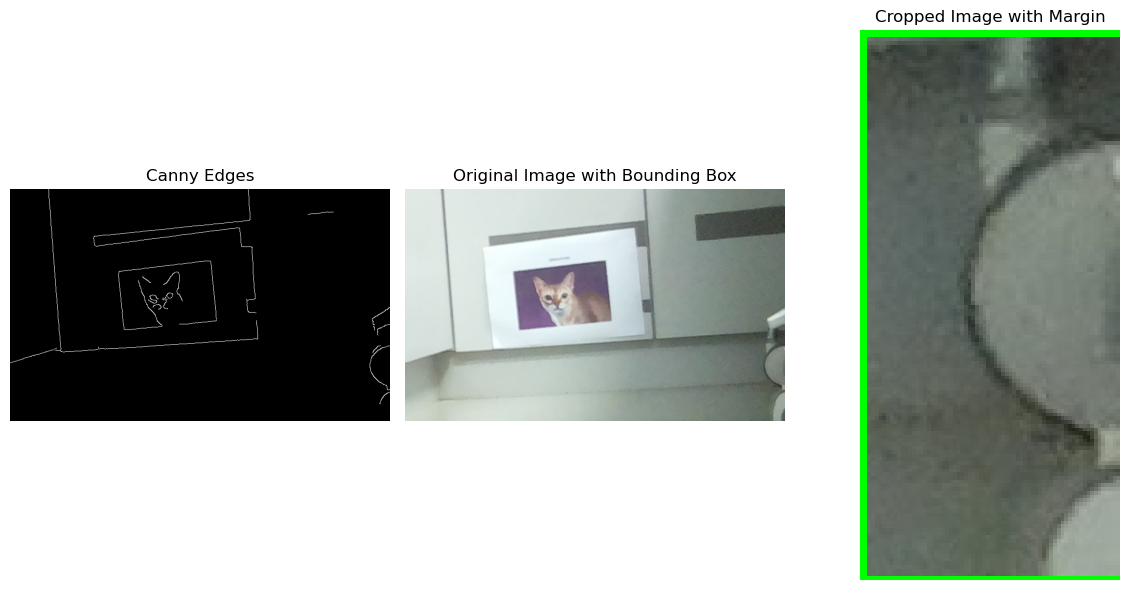

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
# 加载图像
img_path = 'SWS3009Assg/img_trial/test3(2).jpeg'  # 请替换为你自己的图片路径
image = cv2.imread(img_path)

# 调用裁剪函数
cropped_image = process_image(image)

if cropped_image is not None:
    # 显示裁剪后的图片
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Cat Image")
    plt.axis('off')
    plt.show()
else:
    print("Couldn't find a valid paper region or corners.")


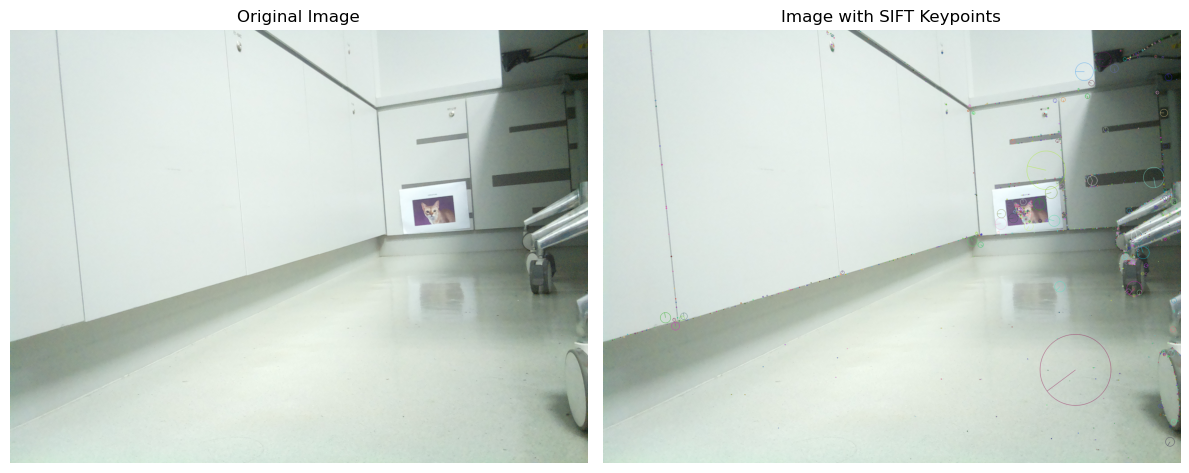

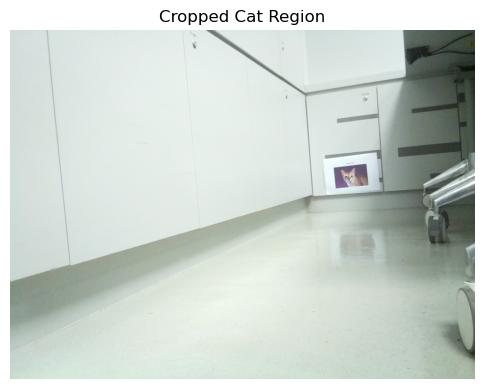

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_plot_sift_features(image):
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Create SIFT detector
    sift = cv2.SIFT_create()
    
    # Step 3: Detect keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    # Step 4: Draw keypoints on the original image
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Step 5: Plot the original image and the image with keypoints
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title("Image with SIFT Keypoints")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    return img_with_keypoints, keypoints, descriptors

def crop_dense_region(image, keypoints, margin=30):
    # Convert keypoints to numpy array of points
    points = np.array([kp.pt for kp in keypoints])

    # Calculate the bounding box around keypoints
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)
    
    # Add smaller margin to the bounding box for tighter crop
    x_min, y_min = max(0, x_min - margin), max(0, y_min - margin)
    x_max, y_max = min(image.shape[1], x_max + margin), min(image.shape[0], y_max + margin)

    # Crop the image around the bounding box
    cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]
    
    # Plot the cropped region
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Cat Region")
    plt.axis('off')
    plt.show()

    return cropped_image


# Load the image
img_path = '/Users/ruiyuhan/Desktop/NUS Deep Learning/SWS3009Assg/img_trial/test3.jpg'  # Example path, replace with actual path
image = cv2.imread(img_path)

# Detect and plot SIFT features
img_with_keypoints, keypoints, descriptors = detect_and_plot_sift_features(image)

# Crop the most dense region based on keypoints
cropped_image = crop_dense_region(image, keypoints)
